In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense



2024-01-07 13:46:25.554328: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-07 13:46:25.611617: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-07 13:46:26.394340: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df = pd.read_csv('DailyDelhiClimateTrain.csv')

In [3]:
df = df.drop(["humidity","wind_speed", "meanpressure"], axis=1)

In [4]:
train_size = int(df.shape[0]*0.8)

In [5]:
train = df.iloc[:train_size, 1]
test = df.iloc[train_size:, 1]

In [6]:
train = np.array(train).reshape(-1, 1)
test = np.array(test).reshape(-1, 1)

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
train_sc = scaler.fit_transform(train)
test_sc = scaler.transform(test)

In [8]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

In [9]:
X_test = test_sc[:-1]
y_test = test_sc[1:]

In [10]:
model = Sequential()
model.add(Dense(12, input_dim = 1, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

model.summary()

model.compile(optimizer='adam',
              loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                24        
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


2024-01-07 13:46:27.816775: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-01-07 13:46:27.816841: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: dziobak
2024-01-07 13:46:27.816854: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: dziobak
2024-01-07 13:46:27.817072: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 520.61.5
2024-01-07 13:46:27.817113: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 520.61.5
2024-01-07 13:46:27.817123: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 520.61.5


Epoch 1/100
37/37 [==============================] - 1s 9ms/step - loss: 0.2982 - val_loss: 0.2758
Epoch 2/100
37/37 [==============================] - 0s 5ms/step - loss: 0.1648 - val_loss: 0.1403
Epoch 3/100
37/37 [==============================] - 0s 5ms/step - loss: 0.0897 - val_loss: 0.0723
Epoch 4/100
37/37 [==============================] - 0s 5ms/step - loss: 0.0483 - val_loss: 0.0401
Epoch 5/100
37/37 [==============================] - 0s 5ms/step - loss: 0.0274 - val_loss: 0.0252
Epoch 6/100
37/37 [==============================] - 0s 5ms/step - loss: 0.0180 - val_loss: 0.0186
Epoch 7/100
37/37 [==============================] - 0s 5ms/step - loss: 0.0143 - val_loss: 0.0155
Epoch 8/100
37/37 [==============================] - 0s 5ms/step - loss: 0.0132 - val_loss: 0.0140
Epoch 9/100
37/37 [==============================] - 0s 5ms/step - loss: 0.0127 - val_loss: 0.0133
Epoch 10/100
37/37 [==============================] - 0s 5ms/step - loss: 0.0124 - val_loss: 0.0126
Epoch 11/

37/37 [==============================] - 0s 4ms/step - loss: 0.0100 - val_loss: 0.0101
Epoch 84/100
37/37 [==============================] - 0s 5ms/step - loss: 0.0100 - val_loss: 0.0100
Epoch 85/100
37/37 [==============================] - 0s 5ms/step - loss: 0.0101 - val_loss: 0.0102
Epoch 86/100
37/37 [==============================] - 0s 5ms/step - loss: 0.0100 - val_loss: 0.0101
Epoch 87/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0100 - val_loss: 0.0100
Epoch 88/100
37/37 [==============================] - 0s 5ms/step - loss: 0.0100 - val_loss: 0.0101
Epoch 89/100
37/37 [==============================] - 0s 5ms/step - loss: 0.0100 - val_loss: 0.0100
Epoch 90/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0100 - val_loss: 0.0100
Epoch 91/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0101 - val_loss: 0.0102
Epoch 92/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0100 - val_loss: 0.0101
Epoch 93/100


In [11]:
y_pred = model.predict(X_test)

10/10 [==============================] - 0s 1ms/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


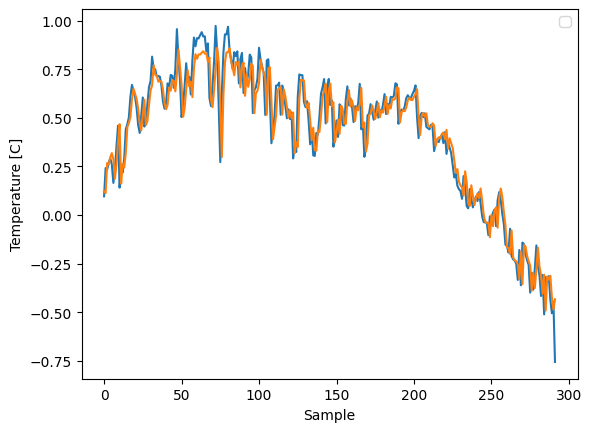

In [12]:
plt.plot(y_test)
plt.plot(y_pred)
plt.xlabel("Sample")
plt.ylabel("Temperature [C]")
plt.legend()

In [15]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9159982097551754

In [ ]:

#r2_score to metryka oceny stosowana do pomiaru dopasowania modelu do danych. Jest to również znane jako współczynnik 
#determinacji (Coefficient of Determination). r2_score mierzy, jak dobrze model regresji przewiduje zmienność zależnej 
#zmiennej względem wartości przewidywanych przez model.

#Wartość r2_score znajduje się w przedziale od 0 do 1.